In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_tickers_data(tf, windowsize):
    tickers = pd.read_fwf("tickers.txt").ticker.to_list()
    alldata = [get_data(t, tf, windowsize).rename({"y": t}, axis = 1) for t in tickers]
    df = pd.DataFrame(alldata[0])
    for i in range(1, len(alldata)):
        df = df.join(alldata[i])

    df = df.dropna()
    return df

def get_data(ticker, timeframe, windowsize):
    # timeframe = d, 1h, minute
    filename = timeframe + '/' + 'Binance_' + ticker + "USDT_" + timeframe + ".csv"
    data = pd.read_csv(filename, skiprows = 1, nrows = windowsize + 1)
    #data["y"] = (data.open + data.high + data.low + data.close)/4
    data = data[["unix", "close"]]
    data = data.rename({"close":"y"}, axis = 1)
    data = data[::-1].reset_index(drop = True)
    data = data.set_index("unix")
    return data

def get_zscore(col):
    mean = np.nanmean(col)
    sd = np.nanstd(col, ddof = 1)
    
    return (col - mean)/sd

def get_zscore_df(data, windowsize):
    df = data.copy()
    w = df.iloc[-windowsize:, :]
    for col in w.columns:
        w[col] = get_zscore(w[col])
    return w

def plot_grided(df, rows, columns):
    cols = df.columns
    plotn = 0
    fig, ax_array = plt.subplots(rows, columns,squeeze=False)
    fig.set_figheight(7)
    fig.set_figwidth(15)
    for i,ax_row in enumerate(ax_array):
        for j,axes in enumerate(ax_row):
            axes.set_title(cols[plotn])
            #axes.set_yticklabels([])
            axes.set_xticklabels([])
            axes.plot(df.loc[:,cols[plotn]],'r-')
            plotn = plotn + 1
    plt.show()
    
def check_for_outliers(df):
    for t, v in zip(df.columns, df.iloc[-1,:]):
        if abs(v) > 2:
            print("FOUND:",t, v)

def plot_scatter(df):
    d = df.copy()
    x = d.iloc[-1, :].values
    y = [i for i in range(1, len(x)+1)]
    yticks = d.columns.to_list()
    plt.yticks(y, yticks)
    plt.scatter(x, y)
    plt.xlim([-3, 3])
    plt.axvline(x=-2, color = "r", alpha = 0.3)
    plt.axvline(x=2, color = "r", alpha = 0.3)
    plt.show()
    
def analyze(timeframe, windowsize):
    df = get_tickers_data(timeframe, windowsize)
    df = get_zscore_df(df, windowsize)
    check_for_outliers(df)
    plot_grided(df, 3, 4)
    plot_scatter(df)

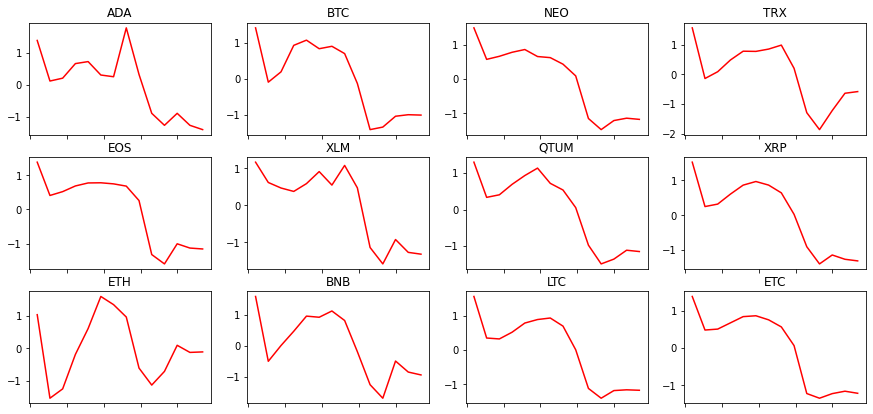

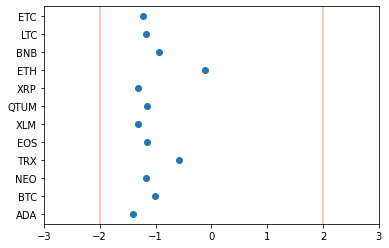

In [3]:
analyze("d", 14)

FOUND: ADA -2.055521891572336


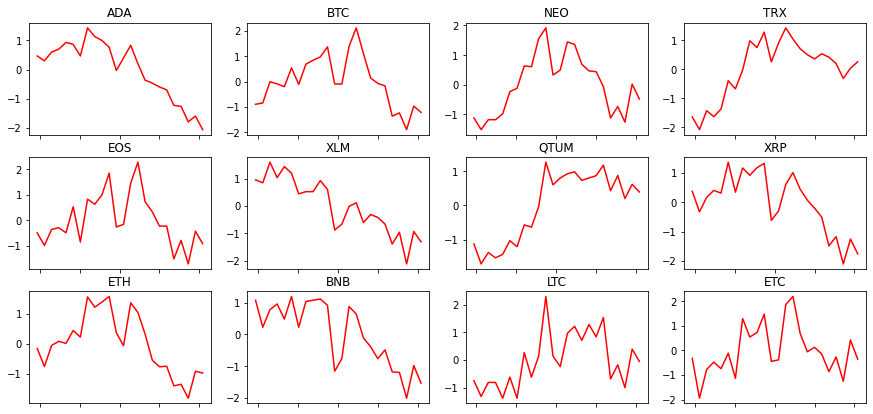

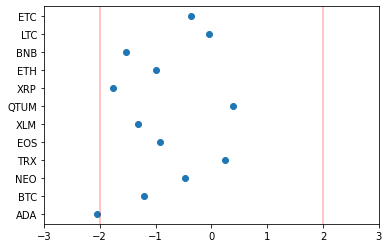

In [4]:
analyze("1h", 24)

FOUND: TRX 2.3539490756857595


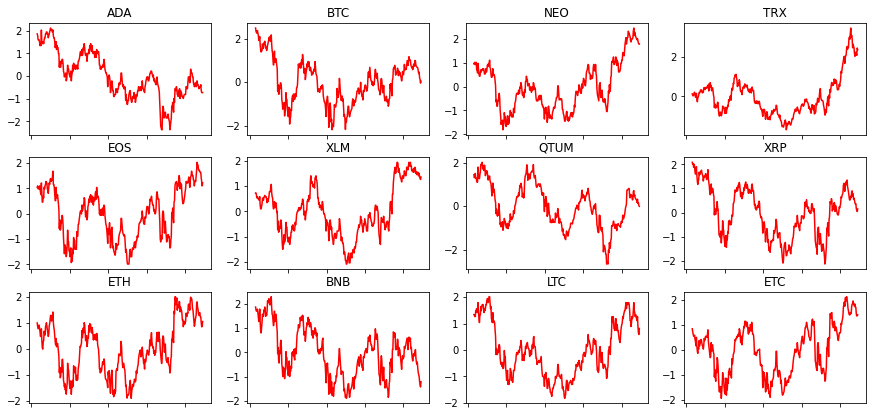

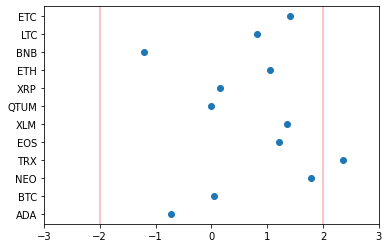

In [5]:
analyze("minute", 360)